In [551]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [552]:
df = pd.read_csv('bank/bank-full.csv', delimiter=';')

In [553]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [554]:
df = df[["age", "job", "marital", "education", "balance", "housing", "contact", "day", "month", "duration", "campaign", "pdays", "previous", "poutcome", "y"]]

In [555]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [556]:
df['education'].mode()

0    secondary
Name: education, dtype: object

## Q1 = `secondary`

<Axes: >

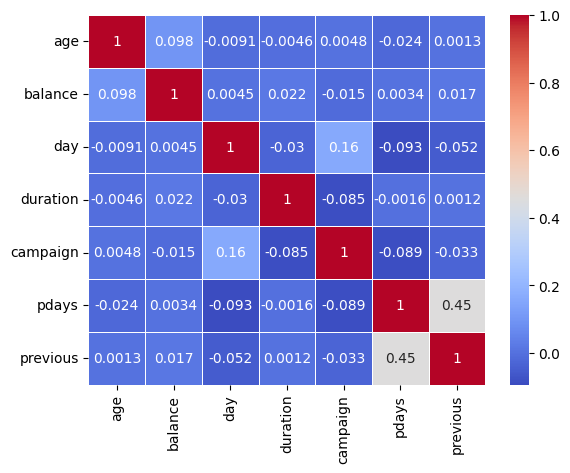

In [557]:
num_cols = df.select_dtypes(include=['number']).columns

sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)

## Q2 = ``pdays and previous``

Encoding

In [558]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

Split the dataset

In [559]:
X = df.drop('y', axis=1).copy()
y = df['y'].copy()

X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.4, random_state=42,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42,stratify=y_rest)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (27126, 14)
Tamaño del conjunto de validación: (9042, 14)
Tamaño del conjunto de prueba: (9043, 14)


In [560]:
print(mutual_info_score(df['y'], df['contact']))
print(mutual_info_score(df['y'], df['education']))
print(mutual_info_score(df['y'], df['housing']))
print(mutual_info_score(df['y'], df['poutcome']))

0.013626837798515465
0.002598182762630869
0.009653977015338946
0.029397241496458754


## Q3 = `poutcome`

In [561]:
# df = df.drop(columns=['age'], axis=1)

In [562]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [563]:
df_one_hot = pd.get_dummies(df, columns=categorical_columns)*1

Hago otra vez el split para que entre con el onehot

In [564]:
X = df_one_hot.drop('y', axis=1).copy()
y = df_one_hot['y'].copy()

X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.4, random_state=42,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42,stratify=y_rest)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (27126, 47)
Tamaño del conjunto de validación: (9042, 47)
Tamaño del conjunto de prueba: (9043, 47)


In [565]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [566]:
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9009068790090687


## Q4 = ``0.9``

wo age = 0.9007962840079629, dif = 0.00011059500110588427<br>
wo balance = 0.9012386640123866, dif = -0.00033178500331787486 <br>
wo marital = 0.900464499004645, dif = 0.00044238000442375913<br>
wo previous = 0.9011280690112807, dif = -0.0002211900022119906<br>
normal = 0.9009068790090687

## Q5 = ``marital``

In [567]:
hist = {}

for i in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(solver='liblinear', C=i, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    hist[i] = accuracy

In [568]:
hist

{0.01: 0.8986949789869498,
 0.1: 0.8994691439946915,
 1: 0.9009068790090687,
 10: 0.9010174740101747,
 100: 0.9009068790090687}

In [569]:
max(hist, key=hist.get)

10

## Q6 = ``10``